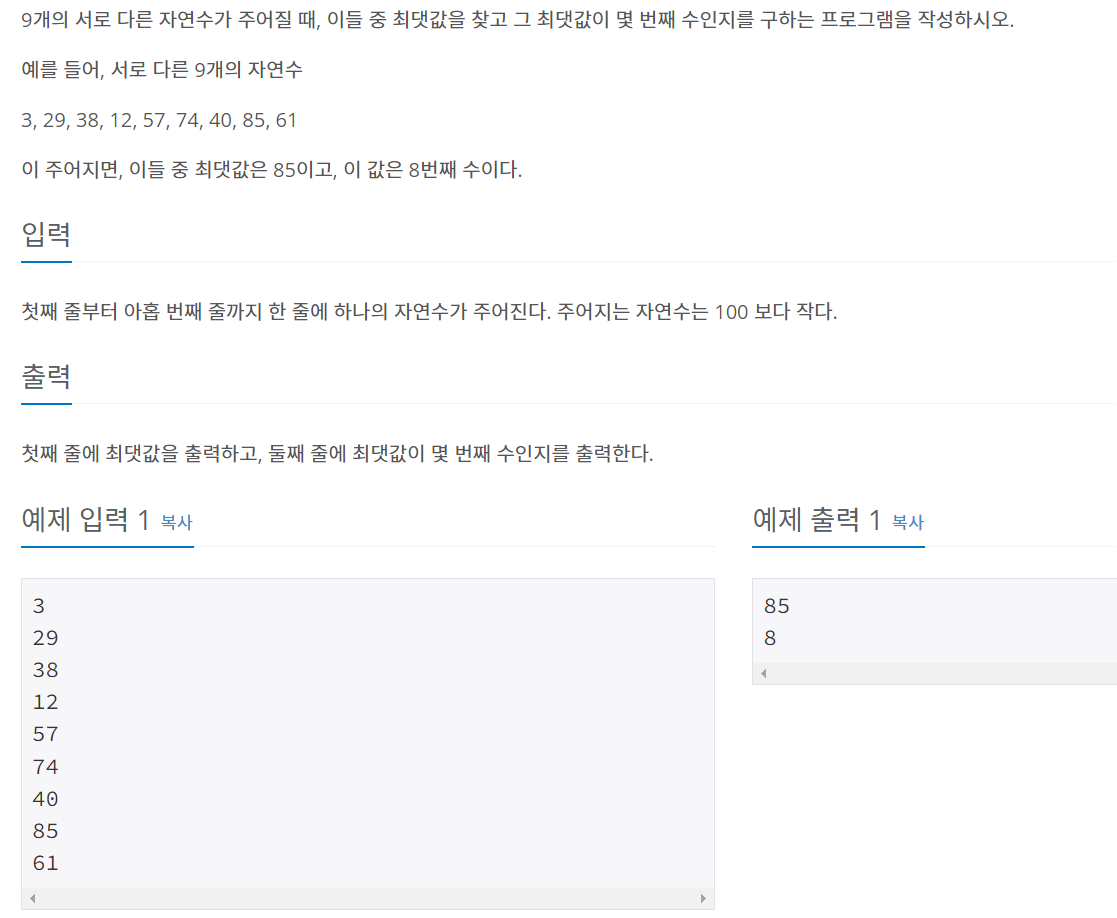

In [ ]:
ls = []
for i in range(9):
    ls.append(int(input()))

max_n = max(ls)
print(max_n)
print(ls.index(max_n)+1)

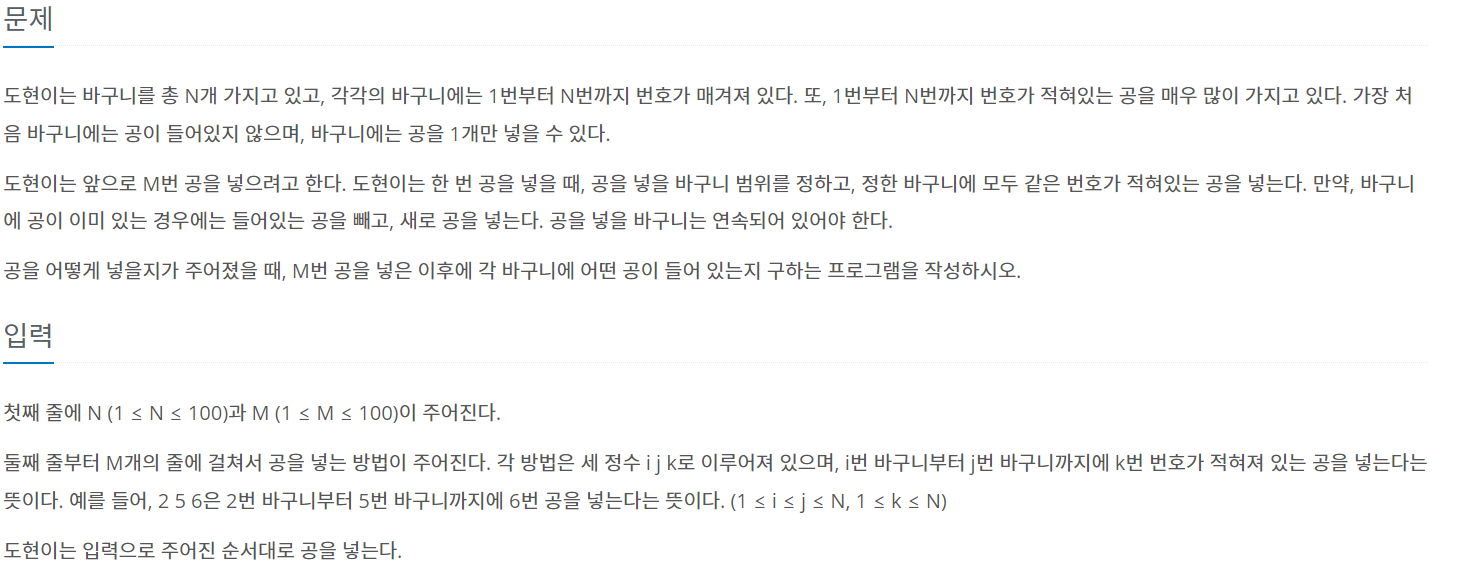
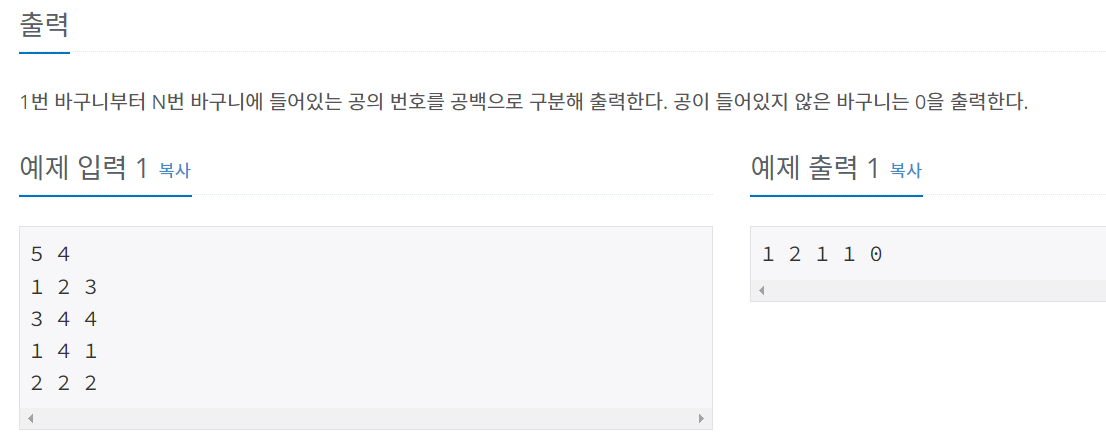

In [172]:
N, M = map(int, input().split())
basket = [0] * (N+1) # N개의 바구니 만들기

for _ in range(M): # M번 반복해서 바구니에 공을 넣는다
    i, j, k = map(int, input().split())  # i,j,k 받기
    for n in range(i, j+1): # i번 바구니 분터 j번 바구니 까지 k번 번호가 있는 공을 넣는다
        basket[n] = k 

for i in range(1, N+1):  # N개의 바구니 출력
    print(basket[i], end = ' ')

1 2 1 1 0 

---

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [174]:
#  데이터 로드
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

#  데이터 합치기
df = pd.concat([train, test], axis=0)

# 결측치 대체
df.fillna(0, inplace=True)

# 레이블 int화
df["Survived"] = df["Survived"].astype("int")

# 수치형 데이터만 추출
df = df.select_dtypes(exclude="float")
df = df.select_dtypes(exclude="object")

# 레이블과 피쳐 분리
x = df.drop(columns="Survived", axis=1)
y = df["Survived"]

# 트레인 테스트 분리 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15)


In [179]:
# LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)
proba = lr_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)


print(confusion_matrix(y_test, lr_pred))
print(f"정확도 : {accuracy_score(y_test, lr_pred)}, 정밀도 : {precision_score(y_test, lr_pred)}, 재현율 : {recall_score(y_test, lr_pred)} f1 : {f1_score(y_test, lr_pred)}")
print( roc_auc_score(y_test, proba))
 

[[179  15]
 [ 49  19]]
정확도 : 0.7557251908396947, 정밀도 : 0.5588235294117647, 재현율 : 0.27941176470588236 f1 : 0.37254901960784315
0.7839599757428745


In [100]:
# DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
proba = dt_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)


print(confusion_matrix(y_test, pred))
print(f"정확도 : {accuracy_score(y_test, pred)}, 정밀도 : {precision_score(y_test, pred)}, 재현율 : {recall_score(y_test, pred)} f1 : {f1_score(y_test, pred)}")
print( roc_auc_score(y_test, proba))

[[160  34]
 [ 36  32]]
정확도 : 0.732824427480916, 정밀도 : 0.48484848484848486, 재현율 : 0.47058823529411764 f1 : 0.4776119402985075
0.6476652516676774


In [139]:
# RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
rf_pred = rf_clf.predict(x_test)
proba = rf_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)

print(confusion_matrix(y_test, rf_pred))
print(f"정확도 : {accuracy_score(y_test, rf_pred)}, 정밀도 : {precision_score(y_test, rf_pred)}, 재현율 : {recall_score(y_test, rf_pred)} f1 : {f1_score(y_test, rf_pred)}")
print( roc_auc_score(y_test, proba))

[[160  34]
 [ 36  32]]
정확도 : 0.732824427480916, 정밀도 : 0.48484848484848486, 재현율 : 0.47058823529411764 f1 : 0.4776119402985075
0.777630382049727


In [180]:
# XGBClassifier

xg_clf = XGBClassifier()
xg_clf.fit(x_train,y_train)
xg_pred = xg_clf.predict(x_test)
proba = xg_clf.predict_proba(x_test)[:, 1].reshape(-1, 1)

print(confusion_matrix(y_test, xg_pred))
print(f"정확도 : {accuracy_score(y_test, xg_pred)}, 정밀도 : {precision_score(y_test, xg_pred)}, 재현율 : {recall_score(y_test, xg_pred)} f1 : {f1_score(y_test, xg_pred)}")
print( roc_auc_score(y_test, proba))

[[169  25]
 [ 38  30]]
정확도 : 0.7595419847328244, 정밀도 : 0.5454545454545454, 재현율 : 0.4411764705882353 f1 : 0.4878048780487804
0.7888872043662827


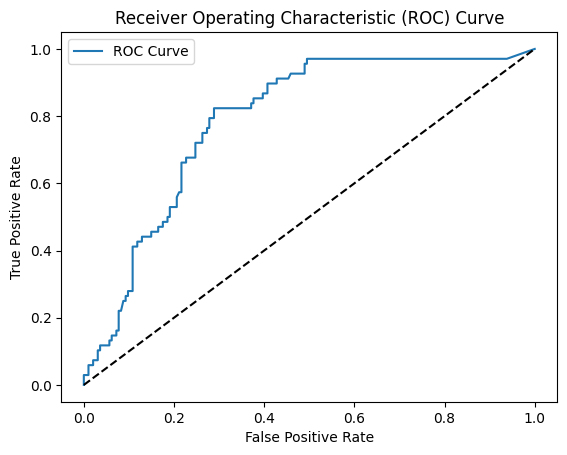

In [181]:
# roc_curve
# TPR(True Positive Rate),FPR(False Positive Rate)

fpr, tpr, thresholds = roc_curve(y_test, proba)

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


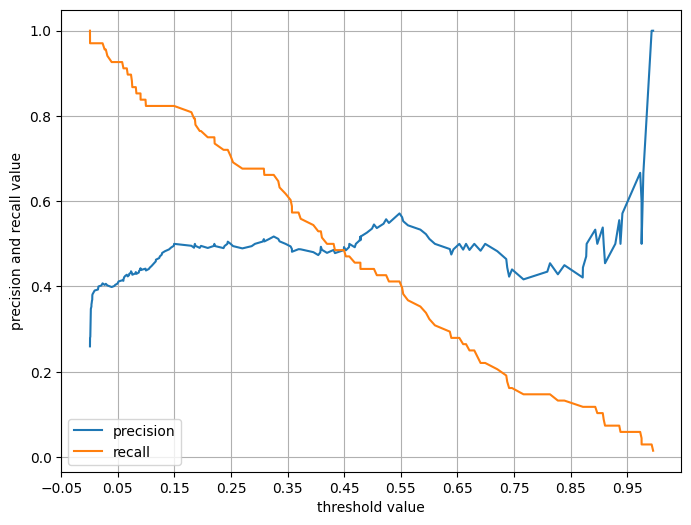

In [133]:
# Precision-Recall 
precision, recall, thresholds = precision_recall_curve(y_test,proba)

plt.figure(figsize=(8,6))
threshold_boundary = thresholds.shape[0]
plt.plot(thresholds, precision[0:threshold_boundary],label = "precision")
plt.plot(thresholds, recall[0:threshold_boundary],label = "recall")

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end , 0.1),2))

plt.xlabel("threshold value"); plt.ylabel("precision and recall value")
plt.legend()
plt.grid()
plt.show()


In [149]:
#  임계값 조정

binarizer = Binarizer(threshold=0.2).fit(proba) 
custom_predict = binarizer.transform(proba)
print('임곗값:',0.2)
print(accuracy_score(y_test,custom_predict))
print(f1_score(y_test,custom_predict))
print(precision_score(y_test,custom_predict))
print(recall_score(y_test,custom_predict))
print("------------------------------------")
binarizer = Binarizer(threshold=0.7).fit(proba) 
custom_predict = binarizer.transform(proba)
print('임곗값:',0.7)
print(accuracy_score(y_test,custom_predict))
print(f1_score(y_test,custom_predict))
print(precision_score(y_test,custom_predict))
print(recall_score(y_test,custom_predict))

임곗값: 0.2
0.7290076335877863
0.5534591194968553
0.4835164835164835
0.6470588235294118
------------------------------------
임곗값: 0.2
0.7404580152671756
0.38181818181818183
0.5
0.3088235294117647


---
# 함수화

In [182]:
def modeling(train_x ,train_y, test_x, test_y):
    model = [
        LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        XGBClassifier()
    ]
    
    rdict = {"model" : [], "Acc" : [], "precision" : [], "recall" : [], "f1" : []}

    for i in model:
        clf = i.fit(train_x, train_y)
        m_pred = clf.predict(test_x)
        rdict["model"].append(clf.__class__.__name__)
        rdict["Acc"].append(accuracy_score(test_y, m_pred))
        rdict["precision"].append(precision_score(test_y, m_pred))
        rdict["recall"].append(recall_score(test_y, m_pred))
        rdict["f1"].append(f1_score(test_y, m_pred))
        print(confusion_matrix(test_y, m_pred))
    
    report_model = pd.DataFrame(rdict)
    return report_model

modeling(x_train ,y_train, x_test, y_test)

[[179  15]
 [ 49  19]]
[[158  36]
 [ 36  32]]
[[161  33]
 [ 39  29]]
[[169  25]
 [ 38  30]]


,model,Acc,precision,recall,f1
0,LogisticRegression,0.755725,0.558824,0.279412,0.372549
1,DecisionTreeClassifier,0.725191,0.470588,0.470588,0.470588
2,RandomForestClassifier,0.725191,0.467742,0.426471,0.446154
3,XGBClassifier,0.759542,0.545455,0.441176,0.487805


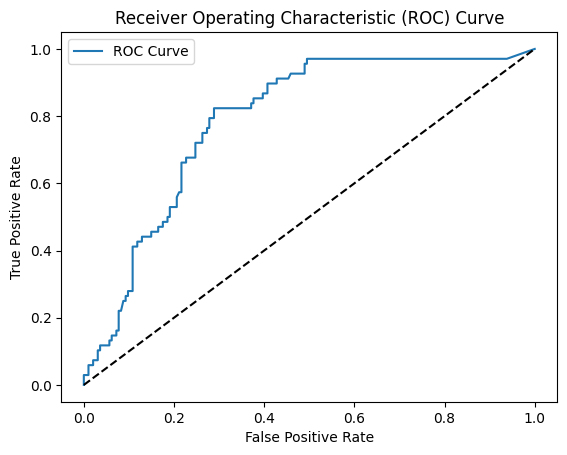

In [183]:
def r_curv(test_y, pred_proba):
    fpr, tpr, _ = roc_curve(test_y, pred_proba)

    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
r_curv(y_test, proba)

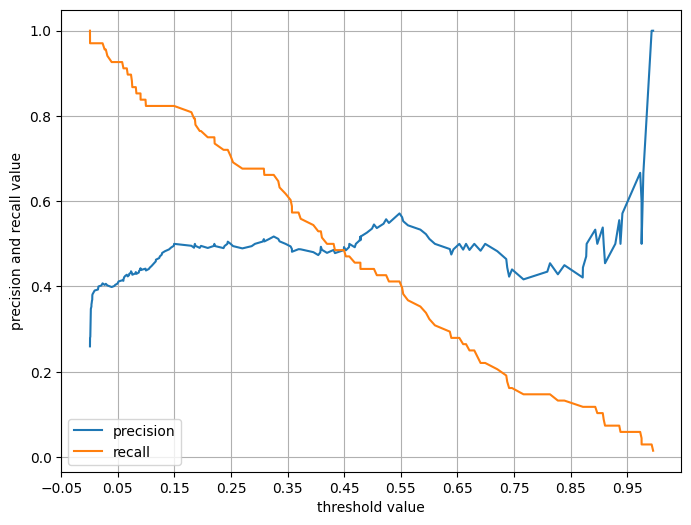

In [134]:
def p_r_curve(test_y, pred_proba):

    precision, recall, thresholds = precision_recall_curve(y_test,proba)

    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary],label = "precision")
    plt.plot(thresholds, recall[0:threshold_boundary],label = "recall")

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end , 0.1),2))

    plt.xlabel("threshold value"); plt.ylabel("precision and recall value")
    plt.legend()
    plt.grid()
    plt.show()
    
p_r_curve(y_test, proba)

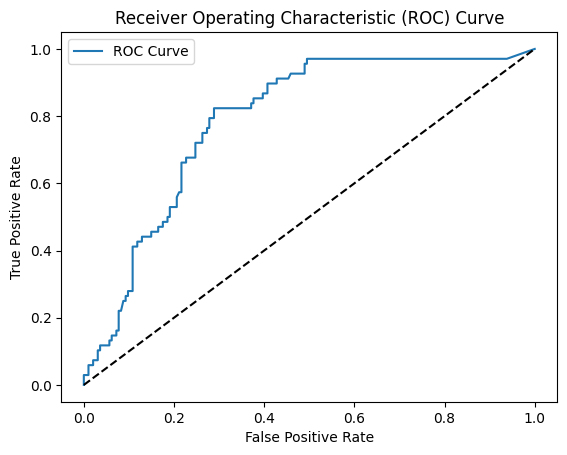

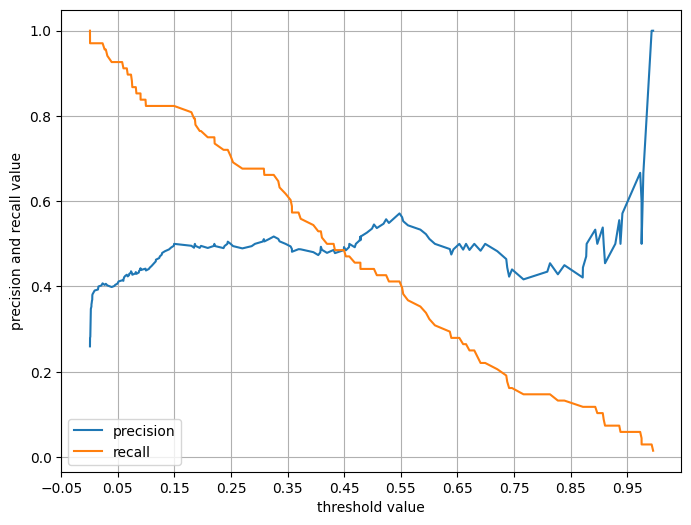

In [187]:
r_curv(y_test, proba)
p_r_curve(y_test, proba)

In [189]:
def custom_binar(test_y, pred_proba, thresholds = [0.1,0.2, 0.5,0.7,0.8]):
    for i in thresholds:
        binarizer = Binarizer(threshold=i).fit(proba) 
        custom_predict = binarizer.transform(proba)
        print('임곗값:',i)
        print(accuracy_score(y_test,custom_predict))
        print(f1_score(y_test,custom_predict))
        print(precision_score(y_test,custom_predict))
        print(recall_score(y_test,custom_predict))

custom_binar(y_test, proba, thresholds = [0.1,0.2, 0.5,0.7,0.8])

임곗값: 0.1
0.683206106870229
0.5743589743589744
0.4409448818897638
0.8235294117647058
임곗값: 0.2
0.732824427480916
0.5930232558139534
0.49038461538461536
0.75
임곗값: 0.5
0.7595419847328244
0.4878048780487804
0.5454545454545454
0.4411764705882353
임곗값: 0.7
0.7366412213740458
0.28865979381443296
0.4827586206896552
0.20588235294117646
임곗값: 0.8
0.7290076335877863
0.2197802197802198
0.43478260869565216
0.14705882352941177
